In [1]:
import tensorflow as tf

## Load MNIST Dataset
- This dataset contains 60,000 Training samples and 10,000 Testing samples.
- Each image contains a number from 0 to 9, and has 28x28 as size.

In [2]:
mnist = tf.keras.datasets.mnist

## Train/Test Split

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

## Visualize some data

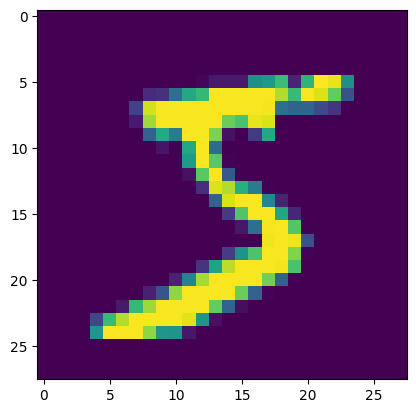

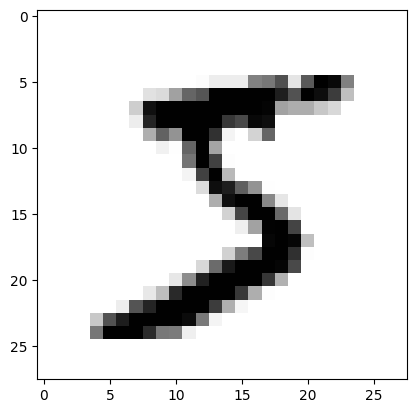

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

## Pre-processing Step: Normalize the data

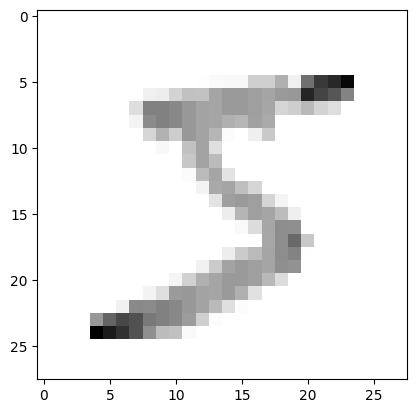

In [7]:
# scale each pixel to a number between 0 and 1
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [8]:
y_train[0]

5

## Resize the image to apply the convolution operation

In [9]:
import numpy as np
x_train_r = np.array(x_train).reshape(-1,28,28,1)
x_test_r = np.array(x_test).reshape(-1,28,28,1)
print("Train samples dimension:",x_train_r.shape)
print("Test samples dimension:",x_test_r.shape)

Train samples dimension: (60000, 28, 28, 1)
Test samples dimension: (10000, 28, 28, 1)


In [10]:
x_train_r.shape[1:]

(28, 28, 1)

## Create the Deep Neural Network

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Activation, Flatten, MaxPooling2D

In [12]:
#initialize the model
model = Sequential()

#create the first convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_train_r.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#create the second convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#create the third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Now, we create the fully connected layers
#Before, we need to flatten the resulted feature map
model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                   

## Model compiling

- Compiling the model means configuring the learning process before training:

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## Model Training

In [15]:
model.fit(x_train_r,y_train,epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 76s 45ms/step - loss: 0.2807 - accuracy: 0.9123 - val_loss: 0.1023 - val_accuracy: 0.9665
Epoch 2/5
1688/1688 [==============================] - 74s 44ms/step - loss: 0.0944 - accuracy: 0.9702 - val_loss: 0.0545 - val_accuracy: 0.9843
Epoch 3/5
1688/1688 [==============================] - 76s 45ms/step - loss: 0.0671 - accuracy: 0.9784 - val_loss: 0.0619 - val_accuracy: 0.9797
Epoch 4/5
1688/1688 [==============================] - 73s 43ms/step - loss: 0.0512 - accuracy: 0.9842 - val_loss: 0.0438 - val_accuracy: 0.9880
Epoch 5/5
1688/1688 [==============================] - 74s 44ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0454 - val_accuracy: 0.9862


## Loss and Accuracy

In [16]:
loss, acc = model.evaluate(x_test_r,y_test)
print("Loss:",loss)
print("Accuracy:",acc)

313/313 [==============================] - 5s 17ms/step - loss: 0.0570 - accuracy: 0.9829
Loss: 0.057024963200092316
Accuracy: 0.9829000234603882


## Predictions

In [17]:
predictions = model.predict(x_test_r)

313/313 [==============================] - 5s 15ms/step


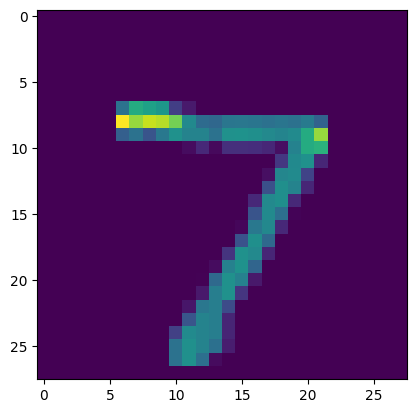

In [18]:
plt.imshow(x_test[0])

In [19]:
print(np.argmax(predictions[0]))

7


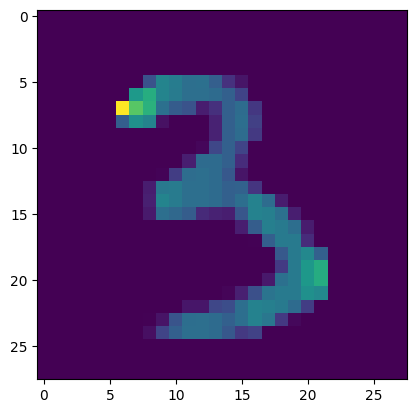

In [21]:
plt.imshow(x_test[32])

In [22]:
print(np.argmax(predictions[32]))

3


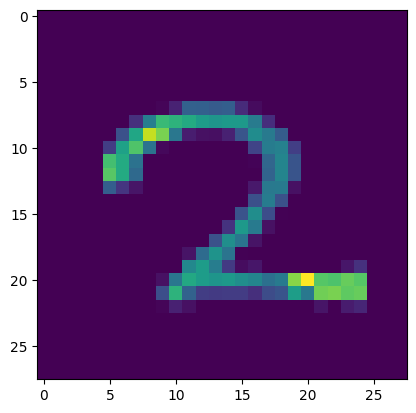

In [25]:
plt.imshow(x_test[77])

In [26]:
print(np.argmax(predictions[77]))

2
